In [10]:
import numpy as np
import matplotlib.pyplot as plt

### The Function

In [11]:
def f(x):
  return x**6 - 2*x**5 - 3*x**4 + 4*x**3 + 5*x**2 + x - 7

def df(x):
  return 6*x**5 - 10*x**4 - 12*x**3 + 12*x**2 + 10*x + 1

In [12]:
tolerance = 1e-12
maximum_iter = 100

In [13]:
print(f(1))
print(f(1.5))
print(f(2))
print(f(2.5))

-1
0.265625
-1
20.890625


### Bisection Method

In [14]:
def bisection(a, b, tolerance, maximum_iter):

  points = []

  # If the endpoints are zero, then they are a root
  if abs(f(a)) < tolerance:
    return a, [a]
  if abs(f(b)) < tolerance:
    return b, [b]

  # Check that the method can be applied
  if f(a)*f(b) > 0:
    print("Error: f(a) and f(b) do not have opposite signs.")
    return None, []

  # Loop over a maximum number of iterations
  for i in range(maximum_iter):
    mid = (a+b)/2
    points.append(mid)

    # If f(mid) is zero, then it is a root
    if abs(f(mid)) < tolerance or abs(b-a) < tolerance:
      return mid, points
    # Otherwise, if f(a) and f(mid) same sign, then mid is new endpoint a
    elif f(a)*f(mid) > 0:
      a = mid
    # Else, mid is the new endpoint b
    else:
      b = mid

  print("Error: Root not found within tolerance for the maximum iterations.")
  return None, points

### Newton's Method

In [15]:
def newton(x0, tolerance, maximum_iter):

  points = [x0]

  # Loop over a maximum number of iterations
  for i in range(maximum_iter):

    # If the derivative at x0 is zero, then divide by zero error
    if abs(df(x0)) < 1e-10:
      print("Error: Derivative is zero.")
      return None, points

    # Main step: x0, f(x0), and df(x0) gives the next approximation
    xnew = x0 - (f(x0)/df(x0))
    points.append(xnew)

    # If f(xnew) is zero, then it is the root
    if abs(f(xnew)) < tolerance or abs(xnew-x0) < tolerance:
      return xnew, points

    # xnew is the next x0 guess
    x0 = xnew

  print("Error: Root not found.")
  return None, points

### Testing

In [16]:
value = bisection(2, 2.5, tolerance, maximum_iter)
print(value)

(2.1045297501827918, [2.25, 2.125, 2.0625, 2.09375, 2.109375, 2.1015625, 2.10546875, 2.103515625, 2.1044921875, 2.10498046875, 2.104736328125, 2.1046142578125, 2.10455322265625, 2.104522705078125, 2.1045379638671875, 2.1045303344726562, 2.1045265197753906, 2.1045284271240234, 2.10452938079834, 2.104529857635498, 2.104529619216919, 2.1045297384262085, 2.1045297980308533, 2.104529768228531, 2.1045297533273697, 2.104529745876789, 2.1045297496020794, 2.1045297514647245, 2.104529750533402, 2.1045297500677407, 2.1045297503005713, 2.104529750184156, 2.1045297501259483, 2.104529750155052, 2.104529750169604, 2.10452975017688, 2.104529750180518, 2.104529750182337, 2.1045297501832465, 2.1045297501827918])


In [17]:
newvalue = newton(-1.75, tolerance, maximum_iter)
print(newvalue)

(-1.4844939481089625, [-1.75, -1.5778878411460695, -1.499926147734054, -1.484988019698871, -1.4844944715799888, -1.4844939481095507, -1.4844939481089625])


### Plotting Points

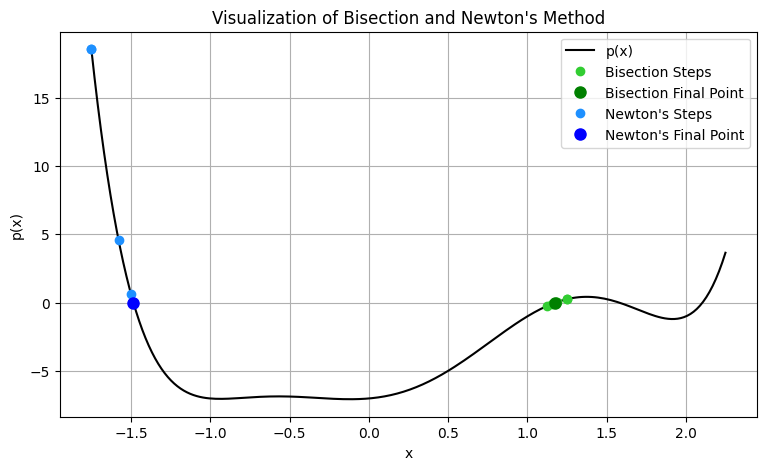

In [18]:
bisect_root, bisect_points = bisection(1, 1.5, tolerance, maximum_iter)
newton_root, newton_points = newton(-1.75, tolerance, maximum_iter)

# print(bisect_root)
# print(bisect_points)
# print(newton_root)
# print(newton_points)

plt.figure(figsize=(9, 5))

x = np.linspace(-1.75, 2.25, 200)
y = f(x)

plt.plot(x, f(x), color='k', label='p(x)')

# Plotting the bisection points + final point larger + label for just one point
for i in bisect_points:
  plt.plot(i, f(i), 'o', color='limegreen')
  if i == bisect_points[0]:
    plt.plot(i, f(i), 'o', color='limegreen', label='Bisection Steps')

plt.plot(bisect_points[-1], f(bisect_points[-1]), 'o', color='g', markersize=8, label='Bisection Final Point')

# Plotting the newton points + final point larger + label for just one point
for i in newton_points:
  plt.plot(i, f(i), 'o', color='dodgerblue')
  if i == newton_points[0]:
    plt.plot(i, f(i), 'o', color='dodgerblue', label="Newton's Steps")

plt.plot(newton_points[-1], f(newton_points[-1]), 'o', color='b', markersize=8, label="Newton's Final Point")

# Labels and graph details

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title("Visualization of Bisection and Newton's Method")

plt.grid(True)
plt.legend()
plt.show()